### Step-1: Business Problem Understanding
The goal of this analysis is to develop a **Convolutional Neural Network (CNN)** model to classify tomato leaves based on their diseases. By accurately identifying the disease affecting the tomato plant, farmers and agriculturalists can take early and appropriate measures to prevent the spread of diseases and ensure crop health, which will:

- **Disease Detection**: Help farmers and agricultural experts quickly detect diseases in tomato plants using image data.
- **Crop Health Monitoring**: Provide insights into the health of tomato crops based on leaf conditions.
- **Yield Optimization**: Help in mitigating the spread of diseases, leading to better yield and crop quality.

The primary objective is to classify tomato leaves into one of the following disease categories or recognize healthy leaves:
- **Tomato Mosaic Virus**
- **Target Spot**
- **Bacterial Spot**
- **Tomato Yellow Leaf Curl Virus**
- **Late Blight**
- **Leaf Mold**
- **Early Blight**
- **Spider Mites (Two-Spotted Spider Mite)**
- **Tomato (Healthy)**
- **Septoria Leaf Spot**

### Step-2: Data Understanding

#### Data Overview:
The dataset is stored in the **"tomato"** folder, containing images of tomato leaves categorized into 10 classes. The dataset is divided into two subsets:
- **Train folder**: Contains 10,000 images of tomato leaves across 10 different disease and healthy classes, used for training the CNN model.
- **Val/Test folder**: Contains 1,000 images across the same 10 classes, used for testing the model.

#### Independent Variables:
- **Tomato Leaf Images**: Image data of tomato leaves showing different diseases and healthy leaves. These are the input to the CNN model.

#### Target Variable:
- **Disease Class**: A categorical variable with 10 possible values representing the disease or health condition of the tomato leaf:
  - Tomato Mosaic Virus
  - Target Spot
  - Bacterial Spot
  - Tomato Yellow Leaf Curl Virus
  - Late Blight
  - Leaf Mold
  - Early Blight
  - Spider Mites (Two-Spotted Spider Mite)
  - Tomato (Healthy)
  - Septoria Leaf Spot

#### Load the dataset

In [1]:
#import required packages
#load train dataset from 'tomato/train'
#load test dataset from 'tomato/val'

In [2]:
import tensorflow as tf
import keras
from keras.preprocessing.image import ImageDataGenerator
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train_path=('tomato/train')
test_path=('tomato/val')

**check number of image classes**

In [4]:
image_classes = os.listdir('tomato/val')
image_classes

['.ipynb_checkpoints',
 'Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_healthy',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Spider_mites Two-spotted_spider_mite',
 'Tomato_Target_Spot',
 'Tomato_Tomato_mosaic_virus',
 'Tomato_Tomato_Yellow_Leaf_Curl_Virus']

In [5]:
dataset = tf.keras.utils.image_dataset_from_directory(
    'tomato/train',
    batch_size=32,
    image_size=(256, 256),
    seed=123,
    shuffle=True
)

Found 10000 files belonging to 11 classes.


**visualize every image labels data**

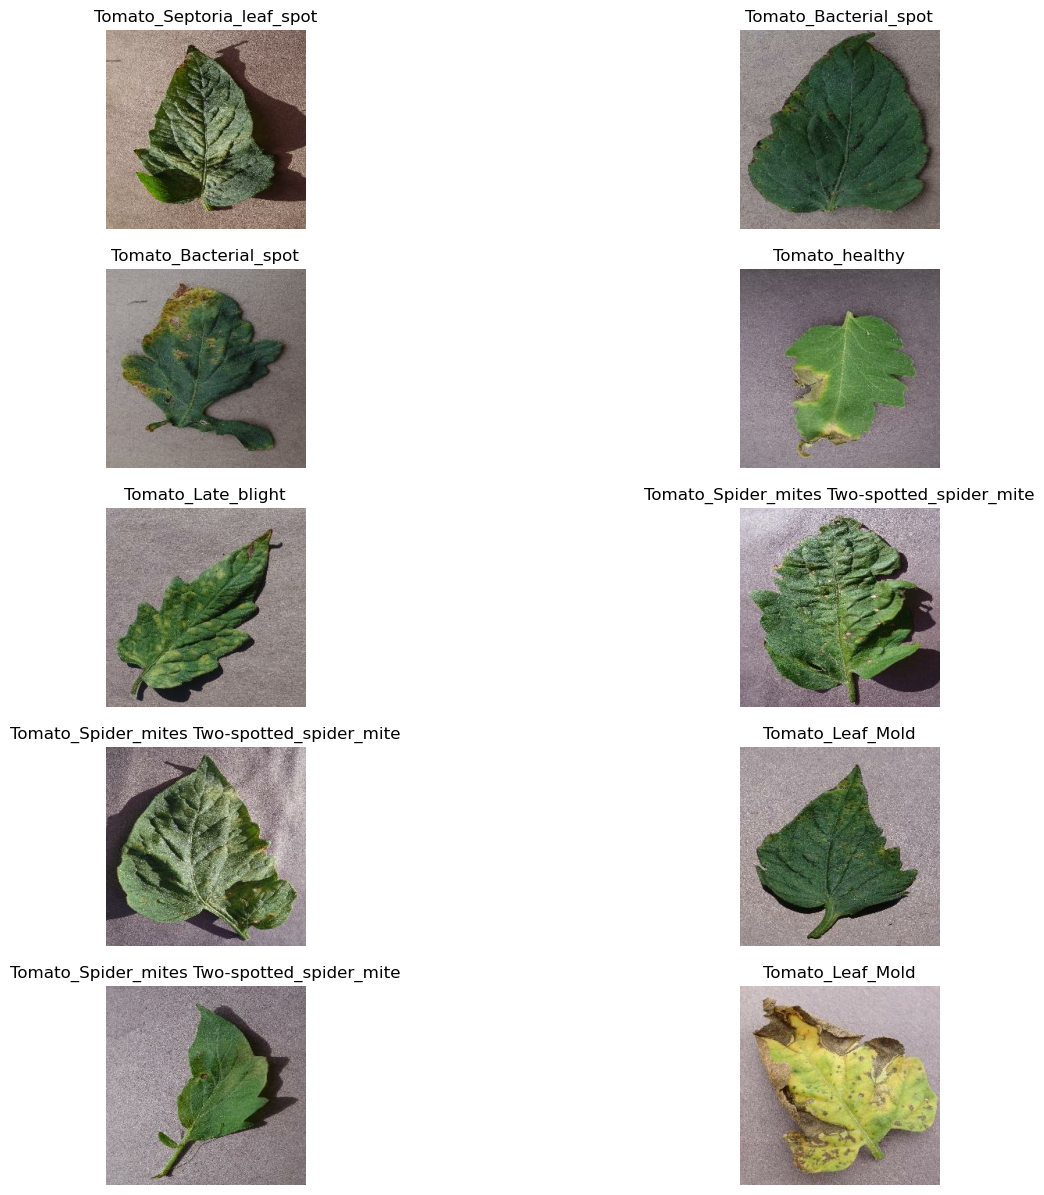

In [6]:
plt.figure(figsize=(15, 15))
for image, lable in dataset.take(1):
    for i in range(10):
        ax = plt.subplot(5, 2, i + 1)
        plt.imshow(image[i].numpy().astype("uint8"))
        plt.title(image_classes[lable[i].numpy()])
        plt.axis('OFF')

In [7]:
data_generator = ImageDataGenerator(rescale = 1/255)
train_data = data_generator.flow_from_directory(train_path,
                                               target_size = (224, 224),
                                               batch_size = 16)

Found 10000 images belonging to 11 classes.


In [8]:
test_data = data_generator.flow_from_directory(test_path,
                                             target_size = (224,224),
                                              batch_size = 16)

Found 1000 images belonging to 11 classes.


# Modeling - Convolution Neural Network

In [9]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import *

#CNN Model
model = Sequential()

#add Conv layer with filters, kernel, padding, activation, input shape
model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same',
                activation = 'relu', input_shape = [224,224,3])) #feature extraction

#add pooling layer ---> dimensionality reduction 
model.add(MaxPooling2D(pool_size = (2,2)))

#add batch normalization layer
#model.add(BatchNormalization())

#add Conv layer with filters, kernel, padding, activation
model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same',activation = 'relu')) #feature extraction

#add pooling layer ---> dimensionality reduction 
model.add(MaxPooling2D())

#add Conv layer with filters, kernel, padding, activation
model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same',activation = 'relu')) #feature extraction

#add pooling layer ---> dimensionality reduction 
model.add(MaxPooling2D())

#add dropout layer
model.add(Dropout(0.2))

#add Flatten layer ---> 1D
model.add(Flatten())

#add Fully Connnected Layers
model.add(Dense(128, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))

#add output layer
model.add(Dense(10, activation = 'softmax')) #10 classes

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 128)      0

**compile the model**

In [11]:
model.compile(optimizer = 'adam',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

**Training the CNN model with train data & Testing the model with test data**

In [14]:
model_history = model.fit(train_data,
                         epochs = 6,
                         validation_data = test_data)

Epoch 1/6


InvalidArgumentError: Graph execution error:

Detected at node 'categorical_crossentropy/softmax_cross_entropy_with_logits' defined at (most recent call last):
    File "<frozen runpy>", line 198, in _run_module_as_main
    File "<frozen runpy>", line 88, in _run_code
    File "C:\Users\ASUS\anaconda3\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "C:\Users\ASUS\anaconda3\Lib\site-packages\traitlets\config\application.py", line 992, in launch_instance
      app.start()
    File "C:\Users\ASUS\anaconda3\Lib\site-packages\ipykernel\kernelapp.py", line 711, in start
      self.io_loop.start()
    File "C:\Users\ASUS\anaconda3\Lib\site-packages\tornado\platform\asyncio.py", line 195, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\ASUS\anaconda3\Lib\asyncio\base_events.py", line 607, in run_forever
      self._run_once()
    File "C:\Users\ASUS\anaconda3\Lib\asyncio\base_events.py", line 1922, in _run_once
      handle._run()
    File "C:\Users\ASUS\anaconda3\Lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\ASUS\anaconda3\Lib\site-packages\ipykernel\kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "C:\Users\ASUS\anaconda3\Lib\site-packages\ipykernel\kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "C:\Users\ASUS\anaconda3\Lib\site-packages\ipykernel\kernelbase.py", line 406, in dispatch_shell
      await result
    File "C:\Users\ASUS\anaconda3\Lib\site-packages\ipykernel\kernelbase.py", line 729, in execute_request
      reply_content = await reply_content
    File "C:\Users\ASUS\anaconda3\Lib\site-packages\ipykernel\ipkernel.py", line 411, in do_execute
      res = shell.run_cell(
    File "C:\Users\ASUS\anaconda3\Lib\site-packages\ipykernel\zmqshell.py", line 531, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\Users\ASUS\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3006, in run_cell
      result = self._run_cell(
    File "C:\Users\ASUS\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3061, in _run_cell
      result = runner(coro)
    File "C:\Users\ASUS\anaconda3\Lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\ASUS\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3266, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\ASUS\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3445, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "C:\Users\ASUS\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3505, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\ASUS\AppData\Local\Temp\ipykernel_13408\108344157.py", line 1, in <module>
      model_history = model.fit(train_data,
    File "C:\Users\ASUS\anaconda3\Lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\ASUS\anaconda3\Lib\site-packages\keras\engine\training.py", line 1685, in fit
      tmp_logs = self.train_function(iterator)
    File "C:\Users\ASUS\anaconda3\Lib\site-packages\keras\engine\training.py", line 1284, in train_function
      return step_function(self, iterator)
    File "C:\Users\ASUS\anaconda3\Lib\site-packages\keras\engine\training.py", line 1268, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\ASUS\anaconda3\Lib\site-packages\keras\engine\training.py", line 1249, in run_step
      outputs = model.train_step(data)
    File "C:\Users\ASUS\anaconda3\Lib\site-packages\keras\engine\training.py", line 1051, in train_step
      loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\ASUS\anaconda3\Lib\site-packages\keras\engine\training.py", line 1109, in compute_loss
      return self.compiled_loss(
    File "C:\Users\ASUS\anaconda3\Lib\site-packages\keras\engine\compile_utils.py", line 265, in __call__
      loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\ASUS\anaconda3\Lib\site-packages\keras\losses.py", line 142, in __call__
      losses = call_fn(y_true, y_pred)
    File "C:\Users\ASUS\anaconda3\Lib\site-packages\keras\losses.py", line 268, in call
      return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\ASUS\anaconda3\Lib\site-packages\keras\losses.py", line 1984, in categorical_crossentropy
      return backend.categorical_crossentropy(
    File "C:\Users\ASUS\anaconda3\Lib\site-packages\keras\backend.py", line 5565, in categorical_crossentropy
      return tf.nn.softmax_cross_entropy_with_logits(
Node: 'categorical_crossentropy/softmax_cross_entropy_with_logits'
logits and labels must be broadcastable: logits_size=[16,10] labels_size=[16,11]
	 [[{{node categorical_crossentropy/softmax_cross_entropy_with_logits}}]] [Op:__inference_train_function_1878]

### Evaluation

In [23]:
model.evaluate(test_data)

63/63 [==============================] - 15s 230ms/step - loss: 0.5241 - accuracy: 0.8690


[0.5240573883056641, 0.8690000176429749]

In [24]:
model.evaluate(train_data)

625/625 [==============================] - 153s 245ms/step - loss: 0.0386 - accuracy: 0.9891


[0.03859112411737442, 0.9890999794006348]